In [37]:
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [44]:
def f(x: np.array) -> np.array:
    """
        DEFINE YOUR PREFERRED FUNCTIONS HERE (e.g. return np.cos(x))
    """
    return np.cos(10*x)

num_examples = 5000
validation_fraction = 0.1
test_fraction = 0.1
validation_set_size = int(num_examples*validation_fraction)
test_set_size = int(num_examples*test_fraction)
training_set_size = num_examples - validation_set_size - test_set_size

all_x = np.random.uniform(0*np.pi, np.pi, (1, num_examples)).T
np.random.shuffle(all_x)

x_training, x_validation, x_test = (all_x[:training_set_size], 
                                    all_x[training_set_size: training_set_size + validation_set_size],
                                    all_x[training_set_size + validation_set_size:])

(y_training, y_validation, y_test) = (f(x) for x in (x_training, x_validation, x_test))

In [45]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel    
        self.fc1 = nn.Linear(1, 50)  # 6*6 from image dimension
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

net = Net()

In [46]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([50, 1])


In [47]:
#input = torch.from_numpy(x_training).requires_grad_(True)
input = torch.tensor(x_training, dtype=torch.float, requires_grad=True)
out = net(input)
print(len(out))

4000


In [48]:
net.zero_grad()

In [49]:
output = net(input)
target = torch.tensor(y_training, dtype=torch.float)
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor(0.5104, grad_fn=<MseLossBackward>)


In [50]:
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=1/4000)

In [51]:
for epoch in range(10000): 


        # get the inputs; data is a list of [inputs, labels]


        # zero the parameter gradients
    optimizer.zero_grad()

        # forward + backward + optimize
    outputs = net(input)
    loss = criterion(outputs, target)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss = loss.item()
    if not epoch % 1000:    # print every 2000 mini-batches
        print('[%03d] loss: %.6f' %
                (epoch + 1, running_loss ))

print('Finished Training')

[001] loss: 0.510446
[1001] loss: 0.000848
[2001] loss: 0.031113
[3001] loss: 0.000700
[4001] loss: 0.017217
[5001] loss: 0.001806
[6001] loss: 0.001224
[7001] loss: 0.021351
[8001] loss: 0.001477
[9001] loss: 0.003643
Finished Training


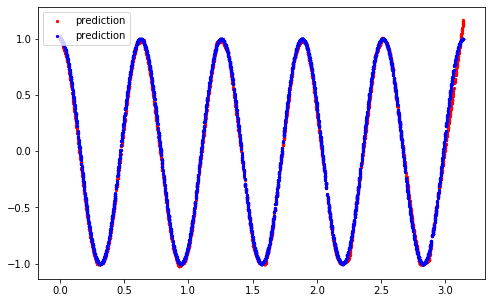

In [52]:
with torch.no_grad():
    out = net(input)
    fig = plt.figure(figsize=(8,5))
    plt.scatter(input.detach().numpy(), out.detach().numpy(), c='r', label='prediction', s=5)
    plt.scatter(input.detach().numpy(), y_training, c='b', label='prediction', s=5)
    plt.legend()
    plt.show()

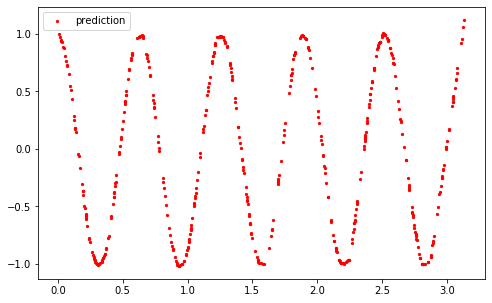

In [53]:
inputs = torch.tensor(x_test, dtype=torch.float, requires_grad=True)
with torch.no_grad():
    out = net(inputs)
    fig = plt.figure(figsize=(8,5))
    plt.scatter(inputs.detach().numpy(), out.detach().numpy(), c='r', label='prediction', s=5)
#     plt.scatter(inputs.detach().numpy(), y_test, c='b', label='prediction', s=5)
    plt.legend()
    plt.show()